In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import csv

output_files = sorted(glob.glob('output-logs-exact/*.log'))
exact_files = sorted(glob.glob('exact-unzipped/*.td'))
print(len(output_files))
print(len(exact_files))

200
200


In [2]:
def parse_files(list_of_files):
    data = []
    for file in list_of_files:
        with open(file, 'r') as f:
            lines = f.readlines()
            # only keep the line that starts with s
            for line in lines:
                if line.startswith('s'):
                    data.append(line.strip())
                    break
    return data
output_data = parse_files(output_files)
exact_data = parse_files(exact_files)
print(output_data[:5])
print(exact_data[:5])

['s td 188 15 262', 's td 48 51 145', 's td 35 45 92', 's td 4 487 490', 's td 332 10 377']
['s td 188 11 262', 's td 52 50 145', 's td 35 45 92', 's td 5 487 490', 's td 339 8 377']


In [10]:
tws = []
for exact in output_data:
    tws.append(int(exact.split()[3]))
print(sorted(tws, reverse=True))

[909, 541, 541, 541, 487, 120, 118, 118, 88, 88, 80, 80, 80, 80, 80, 77, 61, 59, 57, 57, 57, 56, 56, 55, 54, 53, 51, 49, 45, 38, 37, 37, 37, 37, 37, 36, 36, 34, 33, 33, 31, 30, 30, 30, 29, 29, 28, 28, 27, 25, 25, 25, 25, 23, 23, 23, 23, 23, 22, 22, 22, 22, 22, 22, 21, 20, 20, 19, 19, 19, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 7, 7]


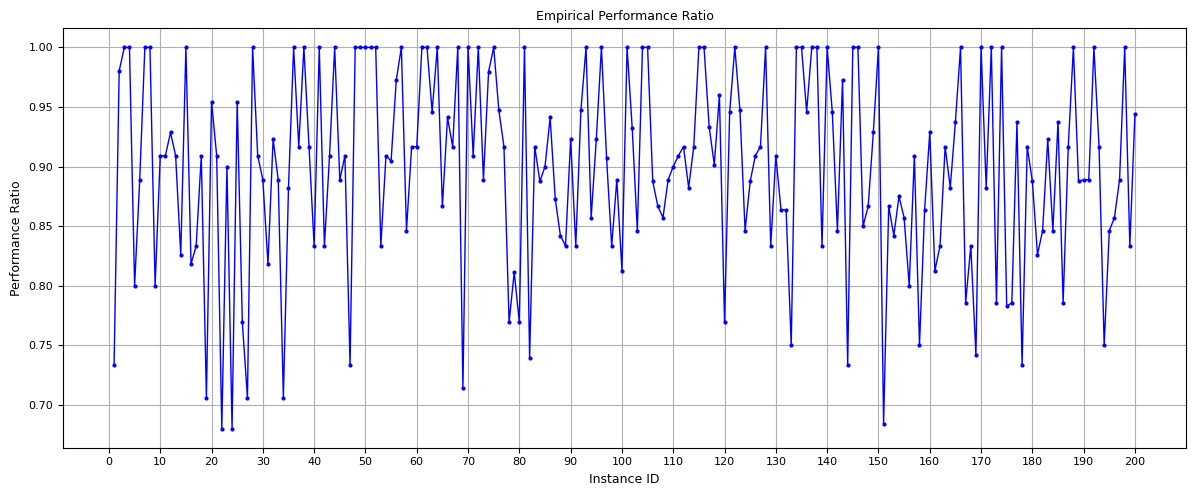

In [3]:
def plot_data(output_data, exact_data):
    val = []
    for exact, heur in zip(exact_data, output_data):
        exact_tw = int(exact.split()[3])
        heur_tw = int(heur.split()[3])
        val.append(exact_tw / heur_tw)
    
    # set figure size
    plt.rcParams.update({'font.size': 8})
    plt.figure(figsize=(12, 5))
    plt.title('Empirical Performance Ratio', fontsize=9)
    plt.xlabel('Instance ID', fontsize=9)
    plt.ylabel('Performance Ratio', fontsize=9)
    plt.xticks(range(0, len(val) + 1, 10), fontsize=8)
    plt.yticks(fontsize=8)
    line_numbers = list(range(1, len(val) + 1))
    plt.plot(line_numbers, val, marker='o', linestyle='-', color='b', linewidth=1, markersize=2)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_data(output_data, exact_data) 

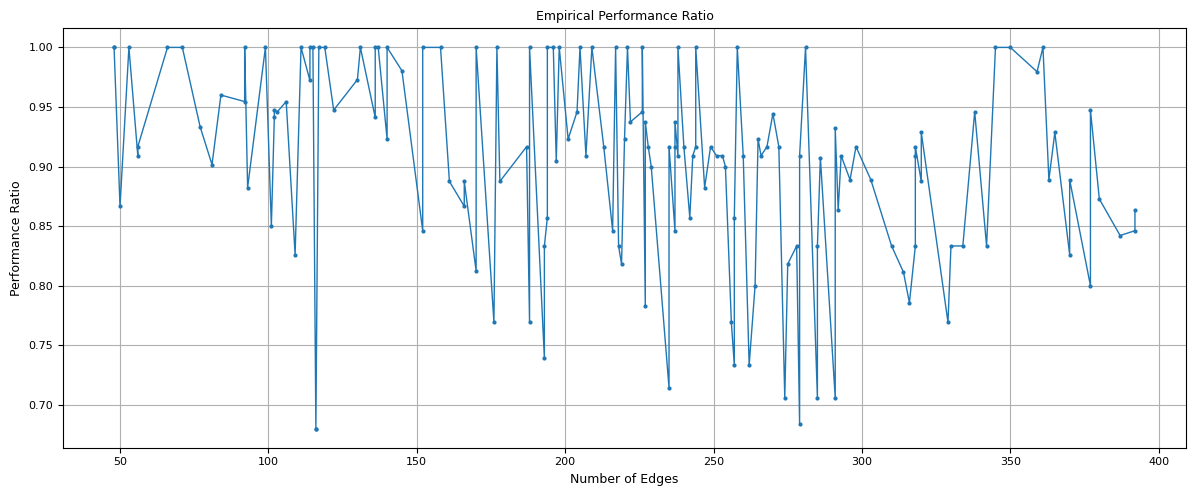

In [15]:
def plot_data(output_data, exact_data):
    val = []
    edges = []
    for exact, heur in zip(exact_data, output_data):
        exact_tw = int(exact.split()[3])
        heur_tw = int(heur.split()[3])
        val.append(exact_tw / heur_tw)
        edges.append(int(exact.split()[-1]))
    # sort both lists by the number of edges
    
    val = [x for _, x in sorted(zip(edges, val))]
    edges.sort()
    
    # set figure size
    plt.figure(figsize=(12, 5))
    plt.title('Empirical Performance Ratio', fontsize=9)
    plt.xlabel('Number of Edges', fontsize=9)
    plt.ylabel('Performance Ratio', fontsize=9)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    line_numbers = list(range(1, len(val) + 1))
    plt.plot(edges[:150], val[:150], marker='o', linestyle='-', linewidth=1, markersize=2)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('edge_vs_ratio.png', dpi=300, bbox_inches='tight')
    plt.show()
plot_data(output_data, exact_data) 

In [ ]:
import numpy as np

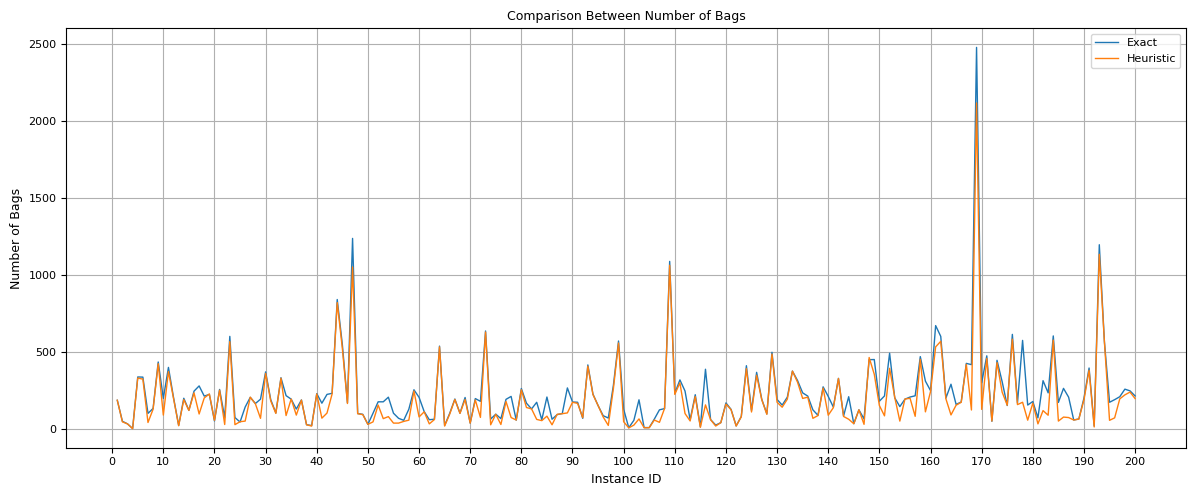

In [27]:
def plot_data(output_data, exact_data):
    exact_bags = []
    heur_bags = []
    for exact, heur in zip(exact_data, output_data):
        exact_bag = int(exact.split()[2])
        heur_bag = int(heur.split()[2])
        exact_bags.append(exact_bag)
        heur_bags.append(heur_bag)
    # sort both lists by the number of edges
    
    # set figure size
    plt.figure(figsize=(12, 5))
    plt.title('Comparison Between Number of Bags', fontsize=9)
    plt.xlabel('Instance ID', fontsize=9)
    plt.ylabel('Number of Bags', fontsize=9)
    plt.xticks(range(0, len(exact_bags) + 1, 10), fontsize=8)
    plt.yticks(fontsize=8)
    line_numbers = list(range(1, len(exact_bags) + 1))
    plt.plot(line_numbers, exact_bags, linestyle='-', linewidth=1, markersize=2)
    plt.plot(line_numbers, heur_bags, linestyle='-', linewidth=1, markersize=2)
    plt.legend(['Exact', 'Heuristic'])
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('bags.png', dpi=300, bbox_inches='tight')
    plt.show()
plot_data(output_data, exact_data) 

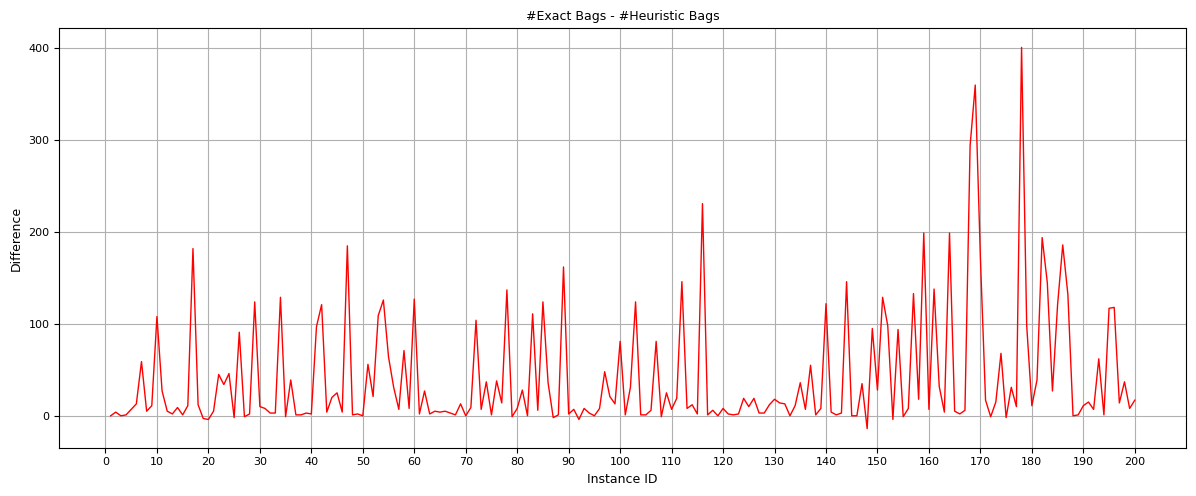

In [29]:
def plot_data(output_data, exact_data):
    exact_bags = []
    heur_bags = []
    for exact, heur in zip(exact_data, output_data):
        exact_bag = int(exact.split()[2])
        heur_bag = int(heur.split()[2])
        exact_bags.append(exact_bag)
        heur_bags.append(heur_bag)
    # sort both lists by the number of edges
    
    # set figure size
    plt.figure(figsize=(12, 5))
    plt.title('#Exact Bags - #Heuristic Bags', fontsize=9)
    plt.xlabel('Instance ID', fontsize=9)
    plt.ylabel('Difference', fontsize=9)
    plt.xticks(range(0, len(exact_bags) + 1, 10), fontsize=8)
    plt.yticks(fontsize=8)
    line_numbers = list(range(1, len(exact_bags) + 1))
    plt.plot(line_numbers, np.array(exact_bags) - np.array( heur_bags), color='r', linestyle='-', linewidth=1, markersize=2)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('diff.png', dpi=300, bbox_inches='tight')
    plt.show()
plot_data(output_data, exact_data) 

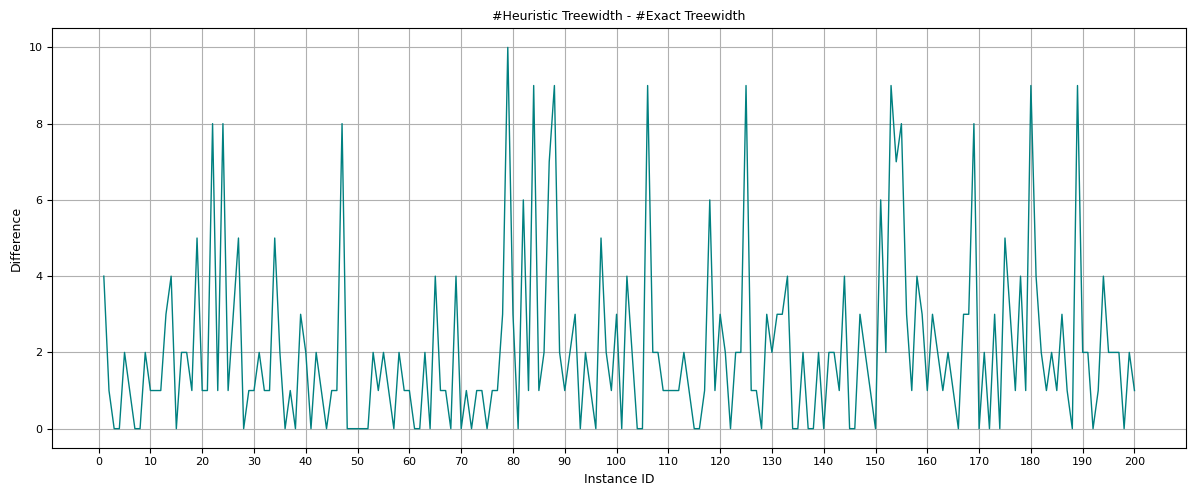

In [33]:
def plot_data(output_data, exact_data):
    exact_bags = []
    heur_bags = []
    for exact, heur in zip(exact_data, output_data):
        exact_bag = int(exact.split()[3])
        heur_bag = int(heur.split()[3])
        exact_bags.append(exact_bag)
        heur_bags.append(heur_bag)
    # sort both lists by the number of edges
    
    # set figure size
    plt.figure(figsize=(12, 5))
    plt.title('#Heuristic Treewidth - #Exact Treewidth', fontsize=9)
    plt.xlabel('Instance ID', fontsize=9)
    plt.ylabel('Difference', fontsize=9)
    plt.xticks(range(0, len(exact_bags) + 1, 10), fontsize=8)
    plt.yticks(fontsize=8)
    line_numbers = list(range(1, len(exact_bags) + 1))
    plt.plot(line_numbers, np.array(heur_bags) - np.array(exact_bags), color='teal', linestyle='-', linewidth=1, markersize=2)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('diff_tw.png', dpi=300, bbox_inches='tight')
    plt.show()
plot_data(output_data, exact_data) 